In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data
normal_data = np.random.normal(0, 1, 1000)
uniform_data = np.random.uniform(-3, 3, 1000)
exponential_data = np.random.exponential(1, 1000)
bimodal_data = np.concatenate([
    np.random.normal(-2, 0.5, 500),
    np.random.normal(2, 0.5, 500)
])

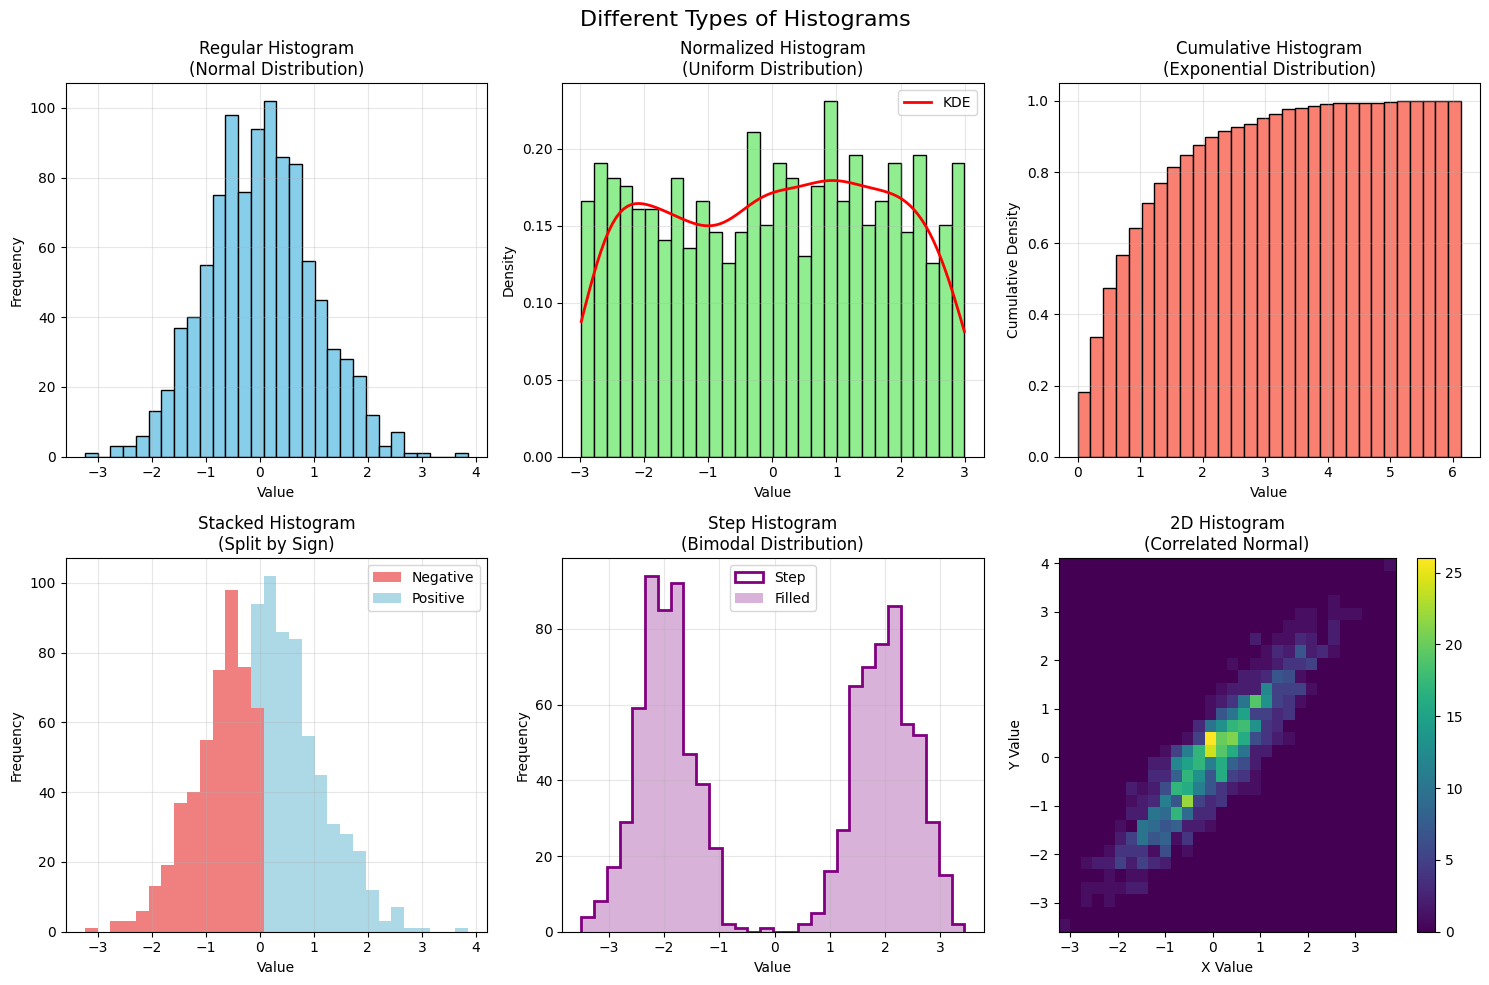

In [3]:
# Create figure and axes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Different Types of Histograms', fontsize=16)

# Regular histogram
axes[0,0].hist(normal_data, bins=30, color='skyblue', edgecolor='black')
axes[0,0].set_title('Regular Histogram\n(Normal Distribution)')
axes[0,0].set_xlabel('Value')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, alpha=0.3)

# Normalized histogram with KDE
axes[0,1].hist(uniform_data, bins=30, density=True, color='lightgreen', edgecolor='black')
x_uniform = np.linspace(uniform_data.min(), uniform_data.max(), 100)
kde_uniform = stats.gaussian_kde(uniform_data)
axes[0,1].plot(x_uniform, kde_uniform(x_uniform), 'r-', lw=2, label='KDE')
axes[0,1].set_title('Normalized Histogram\n(Uniform Distribution)')
axes[0,1].set_xlabel('Value')
axes[0,1].set_ylabel('Density')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Cumulative histogram
axes[0,2].hist(exponential_data, bins=30, cumulative=True, density=True,
               color='salmon', edgecolor='black')
axes[0,2].set_title('Cumulative Histogram\n(Exponential Distribution)')
axes[0,2].set_xlabel('Value')
axes[0,2].set_ylabel('Cumulative Density')
axes[0,2].grid(True, alpha=0.3)

# Stacked histogram
axes[1,0].hist([normal_data[normal_data < 0], normal_data[normal_data >= 0]], 
               bins=30, stacked=True, label=['Negative', 'Positive'],
               color=['lightcoral', 'lightblue'])
axes[1,0].set_title('Stacked Histogram\n(Split by Sign)')
axes[1,0].set_xlabel('Value')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Step histogram
axes[1,1].hist(bimodal_data, bins=30, histtype='step', color='purple', 
               linewidth=2, label='Step')
axes[1,1].hist(bimodal_data, bins=30, histtype='stepfilled', alpha=0.3,
               color='purple', label='Filled')
axes[1,1].set_title('Step Histogram\n(Bimodal Distribution)')
axes[1,1].set_xlabel('Value')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# 2D histogram
x = normal_data
y = x + np.random.normal(0, 0.5, 1000)
h = axes[1,2].hist2d(x, y, bins=30, cmap='viridis')
plt.colorbar(h[3], ax=axes[1,2])
axes[1,2].set_title('2D Histogram\n(Correlated Normal)')
axes[1,2].set_xlabel('X Value')
axes[1,2].set_ylabel('Y Value')

plt.tight_layout()
plt.show()